### Basic NN -
1. Input Layer
    - Inputs
    - Weights
    - Biases
2. Hidden Layer
    - Output Calculation
    - Activation
        - ReLU
        - Softmax
3. Output Layer

In [1]:
# inputs, weights and bias
inputs = [1, 2, 3]
weights = [-1, 2, 0.5]
bias = 3

# output = sum(intputs[i] * weights[i]) + bias
output = bias
for i, j in zip(inputs, weights):
    output += i * j

print('Output:', output)

Output: 7.5


In [2]:
# let's add 3 nodes in the next layer

inputs = [1, 2, 3, 2.5]

weights_1 = [0.2, 0.8, -0.5, 1.0]
weights_2 = [0.5, -0.91, 0.26, -0.5]
weights_3 = [-0.26, -0.27, 0.17, 0.87]

bias_1 = 2
bias_2 = 3
bias_3 = 0.5

# layer 1
output_1 = bias_1
for i, j in zip(inputs, weights_1):
    output_1 += i * j

# layer 2
output_2 = bias_2
for i, j in zip(inputs, weights_2):
    output_2 += i * j

# layer 3
output_3 = bias_3
for i, j in zip(inputs, weights_3):
    output_3 += i * j

output = [output_1, output_2, output_3]

print(f'Output: {output}')

Output: [4.800000000000001, 1.21, 2.385]


In [3]:
inputs = [1, 2, 3, 2.5]
node_weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

# funtional dynamic approach
outputs = []
for weights, bias in zip(node_weights, biases):
    node_output = bias
    for input, weight in zip(inputs, weights):
        node_output += input * weight
    outputs.append(node_output)

print(f"Output: {outputs}")

Output: [4.800000000000001, 1.21, 2.385]


### Difference between weights and biases -

**Weights** are used to scale up or scale down a certain input value -> `input * weight` <br>
- weights determine how much importance to give to a node's input influencing the final output.
$$
input = -0.5, weight = 0.7 \\
input * weight = -0.5 * 0.7 = -0.35
$$

**Biases** are used to produce non-zero values by adding some constant value -> `input + bias` <br>
- biases are used to adjust decision boundary, allowing better fitting of training data.
$$
input = -0.5, bias = 0.7 \\
input + bias = -0.5 + 0.7 = 0.2
$$

<div style="text-align: center;">
    <br>
    <h3>Effect of <i>Bias</i> and <i>Weight</i> -</h3> 
    <img src="../assets/images/bias-&-weight-effect.png" alt="Effect of Bias and Weights" style=" width: 60%;">
</div>

### Shape - 
$$
Array: [1, 4, 2, 8, 9] \\ Shape: (5,), \ Type: 1D \ Aarray, \ Vector
\\ \ \\
2D Array: [ \ [1, 2, 3], \ [4, 5, 6] \ ] \\ Shape: (2, 3), \ Type: 2D \ Array, \ Matrix
\\ \ \\
3D Array: [ \ [ \ [1, 2], [3, 4] \ ], \ [ \ [5, 6], [7, 8] \ ] \ ] \\ Shape: (2, 2, 2), \ Type: 3D \ Array, \ Tensor
$$

### Dot Product - 
$$
\text{Dot Product of Vectors:} \\
\mathbf{a} = [a_1, a_2, a_3], \ \mathbf{b} = [b_1, b_2, b_3] \\
\mathbf{a} \cdot \mathbf{b} = a_1 \cdot b_1 + a_2 \cdot b_2 + a_3 \cdot b_3 \\
\\ \ \\
\text{Example:} \\
\mathbf{a} = [1, 2, 3], \ \mathbf{b} = [4, 5, 6] \\
\mathbf{a} \cdot \mathbf{b} = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 4 + 10 + 18 = 32
$$

In [4]:
# importing numpy for complex operations
import numpy as np

In [5]:
# dot product
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = np.dot(inputs, weights) + bias
print('Output:', output)

Output: 4.8


In [6]:
# dot product for layers
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

outputs = np.dot(weights, inputs) + biases # NOTE: this time we have put weights first (can't interchange them)
print('Output:', outputs)

"""
What's happening ?

>> np.dot(weights, inputs) = [np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)] = [2.8, -1.79, 1.885]

>> [2.8, -1.79, 1.885] + [2, 3, 0.5] = [4.8, 1.21, 2.385] (result)
"""

Output: [4.8   1.21  2.385]


"\nWhat's happening ?\n\n>> np.dot(weights, inputs) = [np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)] = [2.8, -1.79, 1.885]\n\n>> [2.8, -1.79, 1.885] + [2, 3, 0.5] = [4.8, 1.21, 2.385] (result)\n"

In [7]:
"""
We'll now be using batches for multiple layers and nodes. But why batches?
- helps with generalization (https://youtu.be/TEWy9vZcxW4?si=yWBcVOBTcUBNLZOf&t=295)
- can calculated things in parallel (GPU (100s of cores) > CPU (8-12 cores))

But why not just give all the data samples at once (why batches)?
- could lead to overfitting

A batch size of `32` is commonly used. (but it can be more or less)
"""

# shape - (3, 4)
inputs = [
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]
# shape - (3, 4)
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

# we can't do np.dot(weights, inputs) --> will give shape error `ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)`

output = np.dot(inputs, np.array(weights).T) + biases # the dimensions of weights.T is (4, 3) -> (3,4) and (4,3) ==> (3, 3)
print('Output:\n', output)

Output:
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


Transpose of weights ~ <br>
<img src="../assets/images/transpose-weights.png" width="600px">

Adding the biases ~ <br>
<img src="../assets/images/bias-add.png" width="600px">

In [8]:
# add multiple layers

inputs = [
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# later 1
weights_1 = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases_1 = [2, 3, 0.5]

# layer 2
weights_2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]
biases_2 = [-1, 2, -0.5]

layer_1_outputs = np.dot(inputs, np.array(weights_1).T) + biases_1
layer_2_outputs = np.dot(layer_1_outputs, np.array(weights_2).T) + biases_2

print('Layer 2 Output:\n',layer_2_outputs)

Layer 2 Output:
 [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [9]:
np.random.seed(0)

# input -> X
X = [
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# defining 2 hidden layers
class Layer_Dense:
    # randomly generating weights and setting biases as zeros
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer_1 = Layer_Dense(4, 5) # 4 is number of inputs, and 5 is number of neurons which can be any number (like 512, 256 etc...)
layer_2 = Layer_Dense(5, 2) # 5 is the n_inputs value which needs to be same as previous neuron's width and 2 can be any number

layer_1.forward(X) # will store the output in `layer_1.output`
print('Layer 1 Output:\n', layer_1.output)

layer_2.forward(layer_1.output) # as the layer 1 output becomes intput to 2nd layer
print('Layer 2 Output:\n', layer_2.output)


Layer 1 Output:
 [[ 0.01075813  0.10398352  0.02446241  0.0318215   0.01885105]
 [-0.0083498   0.07084641  0.00029336  0.04470153  0.03636054]
 [-0.05076324  0.05568842  0.0079878  -0.03488957  0.00455304]]
Layer 2 Output:
 [[ 0.00148296 -0.00083976]
 [ 0.00141003 -0.00013405]
 [ 0.0020125  -0.00072906]]


**Activation Functions - Adds non-linearity to the network ~**

<img src="../assets/images/activation-function-example.png" width="300px">

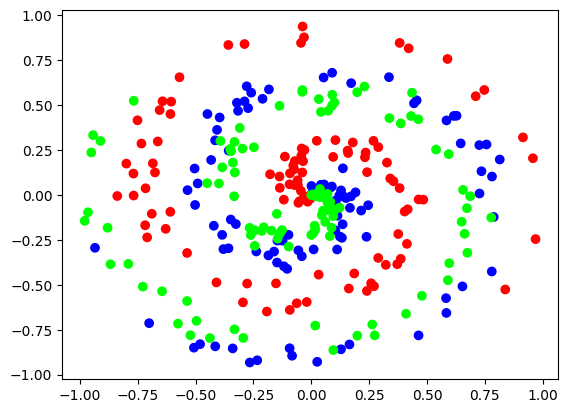

In [10]:
# custom made data for now - spiral data points generation for non-linear data
np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype='uint8')

    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points) # radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + np.random.randn(points) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = class_number
    return X, y

# visualization of data --> using matplotlib
import matplotlib.pyplot as plt
X, y = create_data(100, 3) # 3 classes for 100 points each

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [11]:
# ACTIVATION FUNCTIONS - to add non-linearity to our neural networks so that they can fit better

# importing nnfs for data
import nnfs
from nnfs.datasets import spiral_data

X, y = spiral_data(100, 3)

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

class Activation_ReLU():
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(2, 5)
activation = Activation_ReLU()

layer1.forward(X)
activation.forward(layer1.output)

print(f"After using ReLU: \n{activation.output = }")

After using ReLU: 
activation.output = array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.71214414e-05, 0.00000000e+00, 2.62334664e-05,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.98771350e-05,
        0.00000000e+00],
       ...,
       [1.59032223e-02, 0.00000000e+00, 1.16615305e-02, 0.00000000e+00,
        1.41847464e-02],
       [1.64030086e-02, 0.00000000e+00, 1.51401739e-02, 0.00000000e+00,
        1.42576078e-02],
       [1.50843158e-02, 0.00000000e+00, 8.33516007e-03, 0.00000000e+00,
        1.37809622e-02]])


In [12]:
# SOFTMAX ACTIVATION FUNCTION
layer_outputs = [4.8, 1.21, 2.385]

# E = 2.7182812846 # euler's number
import math
E = math.e

exp_values = [E ** num for num in layer_outputs]
print(f'{exp_values = }')

# let's normalize these to get the probabilities
norm_base = sum(exp_values)
norm_values = [exp / norm_base for exp in exp_values]
print(f'{norm_values = }')

# sum of all the probabilites should be close to 1
print(f'{sum(norm_values) = }')

exp_values = [121.51041751873483, 3.353484652549023, 10.859062664920513]
norm_values = [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
sum(norm_values) = 0.9999999999999999


**_Softmax Activation_** 

$$
S_{i, j} = \frac{e^{z_{i,j}}}{\sum^{L}_{l=1}e^{z_{i,j}}}
$$

<br>
<img src="../assets/images/softmax-function.png" width="600px">

In [13]:
# applying the softmax for a batch

class Activation_SoftMax:
    def forward(self, inputs):
        # we are subtracting with max to keep it in bounded, now 1 is the max value
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # axis(1) - as inputs is a batch we need max for each row not entire batch
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3) # input is (x, y) data so 2
relu = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
softmax = Activation_SoftMax()

dense1.forward(X)
relu.forward(dense1.output)

dense2.forward(relu.output)
softmax.forward(dense2.output)

"""
X(input) -> dense1 -> ReLU -> dense2 -> Softmax -> Output
"""

print(softmax.output[:5]) # softmax.output will have 300 rows

[[0.33333333 0.33333333 0.33333333]
 [0.33333341 0.3333333  0.33333329]
 [0.33333406 0.33333304 0.3333329 ]
 [0.33333447 0.33333288 0.33333265]
 [0.33333468 0.33333279 0.33333252]]


### Loss Calculation

Now, that we have setup things for our forward passes, we need to optimize the weights and biases values so that the model gives good predictions. For that we would first need to calculate the loss.

#### Cross Entropy
<img src="../assets/images/cross-entropy.png" width="600px">

#### One-Hot Encoding
$
Classes: \ 2 \\
Label: 0 \rightarrow \{1, 0\}, \ 1 \rightarrow \{0, 1\} \\
$
$
Classes: \ 3 \\
Label: 0 \rightarrow \{1, 0, 0\}, \ 1 \rightarrow \{0, 1, 0\}, \ 2 \rightarrow \{0, 0, 1\}
$

***Example of Cross Entropy:*** <br>
<img src="../assets/images/cross-entropy-example.png" width="600px">

In [14]:
softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0]) * target_output[0] +
         math.log(softmax_output[1]) * target_output[1] +
         math.log(softmax_output[2]) * target_output[2])
print('Loss:', loss)

# which is essentially the same thing as
loss = -math.log(softmax_output[0])
print('Loss:', loss)

# Let's see the loss values for different output values
print(f"\n{-math.log(0.01) = :.2f}")
print(f"{-math.log(0.2) = :.2f}")
print(f"{-math.log(0.4) = :.2f}")
print(f"{-math.log(0.6) = :.2f}")
print(f"{-math.log(0.8) = :.2f}")
print(f"{-math.log(1.0) = :.2f}")

Loss: 0.35667494393873245
Loss: 0.35667494393873245

-math.log(0.01) = 4.61
-math.log(0.2) = 1.61
-math.log(0.4) = 0.92
-math.log(0.6) = 0.51
-math.log(0.8) = 0.22
-math.log(1.0) = -0.00


In [15]:
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])
class_targets = [0, 1, 1]

print(softmax_outputs[
    range(len(softmax_outputs)), class_targets
]) # this is just indexing ==> arr[[0, 1, 2][0, 1, 1]] {numpy things}

neg_logs = -np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
])
print('Negative Logs:', neg_logs)

average_loss = np.mean(neg_logs)
print('Average Loss:', average_loss)

# it's not done yet - we will have average loss of infinity when any one of the confidence score becomes 0

[0.7 0.5 0.9]
Negative Logs: [0.35667494 0.69314718 0.10536052]
Average Loss: 0.38506088005216804


In [16]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss


class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) # 1e-7 is close to zero

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax.output, y) # taking the softmax outputs and calculating the loss
print('Loss:', loss)

Loss: 1.0986063239051778


In [17]:
# Accuracy
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])
class_targets = [0, 1, 1]

predictions = np.argmax(softmax_outputs, axis=1) # will be [0, 1, 1]
accuracy = np.mean(predictions == class_targets) # mean of [1, 1, 1] => 1

print(f"Example Accuracy: {accuracy * 100: .2f}%")

# Accuracy for our Model
predictions = np.argmax(softmax.output, axis=1)
accuracy = np.mean(predictions == y)

print(f"Model Accuracy: {accuracy * 100: .2f}%")

Example Accuracy:  100.00%
Model Accuracy:  36.33%


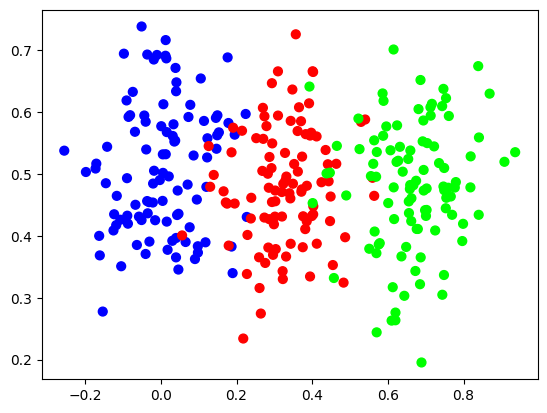

In [19]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()